In [ ]:
#Bibliotecas
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import csv

%cd C:\Users\yagxyz\Downloads\ula
import yf

Importar csv

In [ ]:
col_data = 10 #colunas da tabela
tot_amost_ant = 3258 #total de amostras
numdata = np.zeros((tot_amost_ant,col_data), dtype=float) #matriz numerica dos dados iqs
SNR = 15  #dB

tot_num_radang = 10000

ant_amost = np.zeros((tot_num_radang,4), dtype=float) #incluindo o angulo certo
ang_ok = np.zeros((tot_num_radang),dtype=int)

csvfile = "/Users/yagxyz/Downloads/ula/S_IQs/Ang-fc_sweet/IQs_2.442GHz.csv"
data = read_csv(csvfile);
numdata=data.to_numpy(dtype=float)

rand_angle_array = np.random.randint(0,181,tot_num_radang)

num_amost = 18 #Amostras IQs do CTE
for i in range(tot_num_radang):
  rand_angle = rand_angle_array[i]

  i1 = yf.noise_add(numdata[num_amost*rand_angle:num_amost+num_amost*rand_angle,2],SNR)
  i2 = yf.noise_add(numdata[num_amost*rand_angle:num_amost+num_amost*rand_angle,3],SNR)
  i3 = yf.noise_add(numdata[num_amost*rand_angle:num_amost+num_amost*rand_angle,4],SNR)
  i4 = yf.noise_add(numdata[num_amost*rand_angle:num_amost+num_amost*rand_angle,5],SNR)

  q1 = yf.noise_add(numdata[num_amost*rand_angle:num_amost+num_amost*rand_angle,6],SNR)
  q2 = yf.noise_add(numdata[num_amost*rand_angle:num_amost+num_amost*rand_angle,7],SNR)
  q3 = yf.noise_add(numdata[num_amost*rand_angle:num_amost+num_amost*rand_angle,8],SNR)
  q4 = yf.noise_add(numdata[num_amost*rand_angle:num_amost+num_amost*rand_angle,9],SNR)

  ant_amost[i] = [np.angle(np.mean(i1 + 1j*q1)),np.angle(np.mean(i2 + 1j*q2)),np.angle(np.mean(i3 + 1j*q3)),np.angle(np.mean(i4 + 1j*q4))]
    
  ang_ok[i] = rand_angle

In [ ]:
oculta1 = tf.keras.layers.Dense(units=32,activation='relu', input_shape=[4])
oculta2 = tf.keras.layers.Dense(units=32,activation='relu')
oculta3 = tf.keras.layers.Dense(units=8,activation='relu')
saida= tf.keras.layers.Dense(units=1)

modelo1 = tf.keras.Sequential([oculta1, oculta2, oculta3, saida])

modelo1.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss='mean_squared_error')

In [ ]:
num_int = 100

print("Inicio do treinamento...")
historial1 = modelo1.fit(ant_amost, ang_ok, epochs=num_int, verbose=False)
print("Concluido o treinamento para o canal")

Inicio do treinamento...
Concluido o treinamento para o canal


2.686842679977417


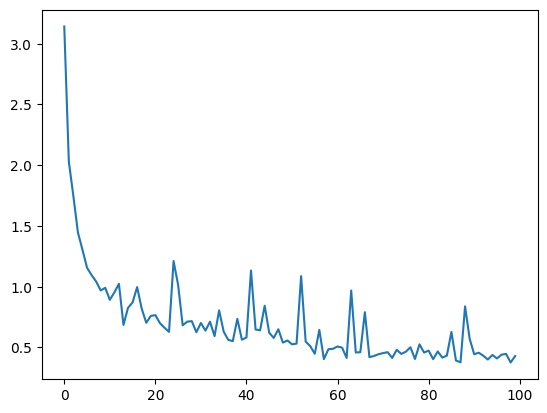

In [ ]:
# plt.xlabel("# Epoca")
# plt.ylabel("Magnitud de pérdida")
plt.plot(np.log10(historial1.history["loss"]))
print(historial1.history["loss"][num_int-1])

In [ ]:
# with open('/Users/yagxyz/Downloads/historial_modleo40.csv', 'w', newline='') as file:
#   writer = csv.writer(file)
#   writer.writerow(np.array(historial_channel40.history["loss"]))

In [ ]:
%cd C:/Users/yagxyz/Downloads/ula/

In [ ]:
# modelo1.save('RN_fc'+str(2.402)+'GHz')

# modelo1.save('RN_fc'+str(2.402)+'GHz.h5')

In [ ]:
# model = tf.keras.models.load_model('RN_fc2.48GHz')
# model.summary()

In [ ]:
num_amost = 18 #Amostras IQs do CTE
SNR = 10
for i in range(181):

  i1 = yf.noise_add(numdata[num_amost*i:num_amost+num_amost*i,2],SNR)
  i2 = yf.noise_add(numdata[num_amost*i:num_amost+num_amost*i,3],SNR)
  i3 = yf.noise_add(numdata[num_amost*i:num_amost+num_amost*i,4],SNR)
  i4 = yf.noise_add(numdata[num_amost*i:num_amost+num_amost*i,5],SNR)

  q1 = yf.noise_add(numdata[num_amost*i:num_amost+num_amost*i,6],SNR)
  q2 = yf.noise_add(numdata[num_amost*i:num_amost+num_amost*i,7],SNR)
  q3 = yf.noise_add(numdata[num_amost*i:num_amost+num_amost*i,8],SNR)
  q4 = yf.noise_add(numdata[num_amost*i:num_amost+num_amost*i,9],SNR)

  ant_amost[i] = [np.angle((i1 + 1j*q1)[4]),np.angle((i2 + 1j*q2)[4]),np.angle((i3 + 1j*q3)[4]),np.angle((i4 + 1j*q4)[4])]
    
  ang_ok[i] = i

In [ ]:
ang_resul = np.zeros((181),dtype=float)
maior = 0
for i in range(181):
  resultado1 = modelo1.predict(np.ones((1,4))*ant_amost[i])
  erro = abs(resultado1 - ang_ok[i])
  maior = max([erro,maior])
  ang_resul[i] = resultado1
  print(maior)

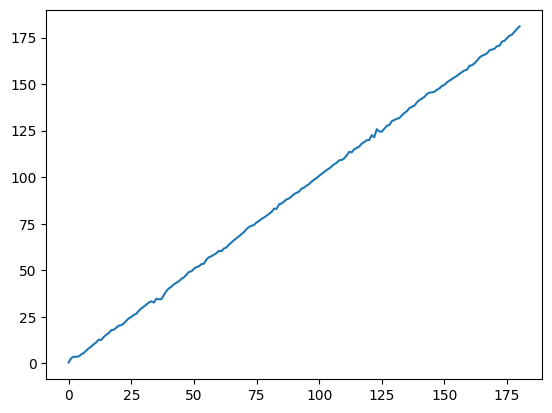

In [ ]:
plt.plot(ang_resul)

In [ ]:
# with open('/Users/yagxyz/Downloads/rn_15dB.csv', 'w', newline='') as file:
#   writer = csv.writer(file)
#   writer.writerow(ang_resul)